In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn import metrics

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [8]:
def encode(x):
    if (x <= 0):
        return 0
    elif (x >= 1):
        return 1

In [13]:
def do_apriori(data, minimum_sup, country=''):

    basket = (data.groupby(['CustomerID', 'Description'])['Quantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('CustomerID'))

    if country != "":
        basket = (data[data['Country'] == country]
                .groupby(['InvoiceNo', 'Description'])['Quantity']
                .sum().unstack().reset_index().fillna(0)
                .set_index('InvoiceNo'))

    basket = (data.groupby(['InvoiceNo', 'Description'])['Quantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('InvoiceNo'))

    basket_sets = basket.applymap(encode)

    frequent_itemsets = apriori(basket_sets, min_support=minimum_sup, use_colnames=True)

    return frequent_itemsets

In [25]:
def do_association_rule(data, picked_metric, picked_threshold): 
    return association_rules(data, metric=picked_metric, min_threshold=picked_threshold)

In [21]:
# Importing the Data

data = pd.read_csv("OnlineRetail.csv")
#print(data)

print('Number of unique Customers:  ', len(data.CustomerID.unique()))
print('Number of unique Invoice:    ', len(data.InvoiceNo.unique()))
print('Number of unique Stock items:', len(data.StockCode.unique()))
print()
print(len(data.Country.unique()), 'unique countries:')
print(data.Country.value_counts())

Number of unique Customers:   4335
Number of unique Invoice:     18405
Number of unique Stock items: 3659

37 unique countries:
United Kingdom          354005
Germany                   8659
France                    8034
EIRE                      7138
Spain                     2423
Netherlands               2326
Belgium                   1935
Switzerland               1811
Portugal                  1425
Australia                 1184
Norway                    1049
Channel Islands            744
Italy                      741
Finland                    647
Cyprus                     612
Sweden                     428
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     248
Unspecified                244
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
Unit

In [35]:
frequent_items = do_apriori(data, 0.01)

frequent_items.head()

,support,itemsets
0,0.010432,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.013149,(10 COLOUR SPACEBOY PEN)
2,0.010160,(12 MESSAGE CARDS WITH ENVELOPES)
3,0.014996,(12 PENCIL SMALL TUBE WOODLAND)
4,0.016680,(12 PENCILS SMALL TUBE RED RETROSPOT)


In [43]:
rules = do_association_rule(frequent_items, "lift", 20)

rules.sort_values('confidence', ascending = False, inplace = True)

rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
83,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROS...",(REGENCY TEA PLATE GREEN ),0.010704,0.014670,0.010052,0.939086,64.014382,0.009895,16.175835
82,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE GRE...",(REGENCY TEA PLATE ROSES ),0.010975,0.017821,0.010052,0.915842,51.390440,0.009856,11.670595
77,"(POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...",(POPPY'S PLAYHOUSE KITCHEN),0.011138,0.018799,0.010106,0.907317,48.263499,0.009897,10.586640
89,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.014398,0.037544,0.012986,0.901887,24.022035,0.012445,9.809646
38,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN ),0.012171,0.014670,0.010975,0.901786,61.471726,0.010797,10.032452
68,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.023689,0.037544,0.021190,0.894495,23.825164,0.020301,9.122408
88,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.014724,0.042543,0.012986,0.881919,20.730161,0.012359,8.108466
42,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE ROSES ),0.012171,0.017821,0.010704,0.879464,49.349208,0.010487,8.148446
64,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(GREEN REGENCY TEACUP AND SAUCER),0.016789,0.037544,0.014724,0.877023,23.359771,0.014094,7.826286
78,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",(POPPY'S PLAYHOUSE BEDROOM ),0.011682,0.017169,0.010106,0.865116,50.387548,0.009905,7.286504


In [44]:
# data.groupby('InvoiceNo').head()

In [10]:
transaction_series = data.groupby(['InvoiceNo'])['StockCode'].apply(list)
transaction_df = pd.DataFrame(transaction_series).rename(columns={'StockCode':'Items'})
#transaction_df

In [15]:
# Code from MLxtend
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# print(df)

In [57]:
#frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
#frequent_itemsets

,support,itemsets
0,0.010432,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.013149,(10 COLOUR SPACEBOY PEN)
2,0.010160,(12 MESSAGE CARDS WITH ENVELOPES)
3,0.014996,(12 PENCIL SMALL TUBE WOODLAND)
4,0.016680,(12 PENCILS SMALL TUBE RED RETROSPOT)
...,...,...
975,0.014398,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY..."
976,0.010106,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO..."
977,0.010052,"(REGENCY TEA PLATE GREEN , REGENCY TEA PLATE P..."
978,0.012986,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC..."


In [47]:
#frequent_itemsets = apriori(df, min_support=0.000008, use_colnames=True)

#https://pbpython.com/market-basket-analysis.html



#basket_sets = basket.applymap(encode)

In [59]:
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=3)

rules



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.019234,0.055909,0.010269,0.533898,9.549464,0.009194,2.025505
1,(PACK OF 72 RETROSPOT CAKE CASES),(60 CAKE CASES DOLLY GIRL DESIGN),0.055909,0.019234,0.010269,0.183673,9.549464,0.009194,1.201438
2,(60 CAKE CASES VINTAGE CHRISTMAS),(SET OF 20 VINTAGE CHRISTMAS NAPKINS),0.025319,0.026569,0.010160,0.401288,15.103676,0.009488,1.625874
3,(SET OF 20 VINTAGE CHRISTMAS NAPKINS),(60 CAKE CASES VINTAGE CHRISTMAS),0.026569,0.025319,0.010160,0.382413,15.103676,0.009488,1.578208
4,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.035697,0.027221,0.012062,0.337900,12.413256,0.011090,1.469232
...,...,...,...,...,...,...,...,...,...
903,"(LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE)","(LUNCH BAG BLACK SKULL., LUNCH BAG PINK POLKA...",0.024885,0.025211,0.010486,0.421397,16.715127,0.009859,1.684730
904,(LUNCH BAG BLACK SKULL.),"(LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...",0.057158,0.015159,0.010486,0.183460,12.102447,0.009620,1.206115
905,(LUNCH BAG PINK POLKADOT),"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",0.050584,0.014235,0.010486,0.207304,14.562709,0.009766,1.243560
906,(LUNCH BAG RED RETROSPOT),"(LUNCH BAG BLACK SKULL., LUNCH BAG PINK POLKA...",0.069981,0.014127,0.010486,0.149845,10.607277,0.009498,1.159639


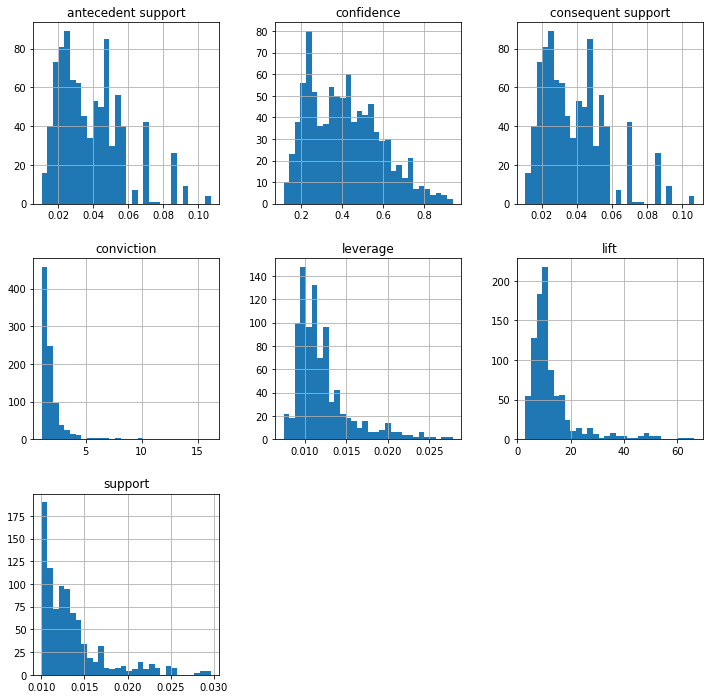

In [62]:
rules.hist(figsize=[12,12], bins = 30)
plt.show()